In [57]:
import pandas as pd
import re

def clean_singapore_demographics_csv(file_path):
    # Read the raw CSV file
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    
    # Find lines that contain actual data (not headers, notes, or empty lines)
    data_lines = []
    current_planning_area = None
    
    for line in lines:
        # Split by semicolon and clean
        parts = [part.strip() for part in line.split(';')]
        
        # Skip if line doesn't have enough columns or is clearly a header/note
        if len(parts) < 20:
            continue
        
        # Skip header lines, notes, and empty lines
        if (parts[1] in ['GENERAL HOUSEHOLD SURVEY 2015', 'Table 7', 'Planning Area', '', 'Note:'] or
            'continued' in parts[1] or 'Number' in parts[1] or parts[1] == 'Total'):
            continue
        
        # Check if this is a planning area row (has data in column 1)
        if parts[1] and parts[1] != '' and not parts[1].startswith(' '):
            current_planning_area = parts[1]
            
            # If it also has subzone data in column 2, it's a planning area total
            if parts[2] and parts[2] != '':
                # This is a planning area total row
                clean_row = [current_planning_area, 'Total'] + parts[3:]
                data_lines.append(clean_row)
        
        # Check if this is a subzone row (empty column 1, data in column 2)
        elif not parts[1] and parts[2] and current_planning_area:
            # This is a subzone row
            clean_row = [current_planning_area, parts[2]] + parts[3:]
            data_lines.append(clean_row)
    
    # Create column names
    columns = ['Planning_Area', 'Subzone', 'Total', 'Age_0_4', 'Age_5_9', 'Age_10_14', 
               'Age_15_19', 'Age_20_24', 'Age_25_29', 'Age_30_34', 'Age_35_39', 
               'Age_40_44', 'Age_45_49', 'Age_50_54', 'Age_55_59', 'Age_60_64', 
               'Age_65_69', 'Age_70_74', 'Age_75_79', 'Age_80_84', 'Age_85_Over']
    
    # Create DataFrame
    df = pd.DataFrame(data_lines, columns=columns)
    
    # Clean numeric data
    for col in columns[2:]:  # Skip Planning_Area and Subzone
        df[col] = df[col].apply(clean_numeric)
    
    # Remove rows where all numeric columns are 0 or empty
    numeric_cols = columns[2:]
    df = df[df[numeric_cols].sum(axis=1) > 0]
    
    # Reset index
    df = df.reset_index(drop=True)
    
    return df

def clean_numeric(value):
    """Clean numeric values - remove dots used as thousands separators, handle dashes"""
    if pd.isna(value) or value == '' or value == '-':
        return 0
    
    # Remove dots used as thousands separators (e.g., "3.902.690" -> "3902690")
    if isinstance(value, str):
        # Remove dots that are thousands separators
        value = re.sub(r'(\d)\.(\d{3})', r'\1\2', value)
        value = re.sub(r'(\d)\.(\d{3})', r'\1\2', value)  # Run twice for numbers like 3.902.690
        
        # Convert to numeric
        try:
            return int(value)
        except:
            return 0
    
    return value

# Usage
cleaned_df = clean_singapore_demographics_csv('../../datasets/SingaporeStatistic_Residential_AgeGroup/SingStat_ResidentPopulationBy_AgeGroup.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', 50)       # Show up to 50 rows
pd.set_option('display.width', None)        # Auto-adjust width
pd.set_option('display.max_colwidth', 20)   # Limit column width

# Now display your dataframe
cleaned_df

,Planning_Area,Subzone,Total,Age_0_4,Age_5_9,Age_10_14,Age_15_19,Age_20_24,Age_25_29,Age_30_34,Age_35_39,Age_40_44,Age_45_49,Age_50_54,Age_55_59,Age_60_64,Age_65_69,Age_70_74,Age_75_79,Age_80_84,Age_85_Over
0,Ang Mo Kio,Total,174770,6790,7660,8290,9320,10310,11170,12250,13070,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
1,Bedok,Total,289750,11690,13400,14750,16930,19450,19860,19270,20850,22520,21460,23430,23380,20590,16750,9310,7330,4760,4010
2,Bishan,Total,90700,3430,4330,4710,5520,6860,6460,5720,6000,7070,6800,7540,7700,6360,4860,2730,2140,1370,1090
3,Boon Lay,Total,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bukit Batok,Total,139270,5510,6890,7970,9240,10070,10460,9760,9940,10980,11310,12190,11770,9370,5990,3060,2230,1450,1090
5,Bukit Merah,Total,155840,7210,7480,6640,6860,7700,9340,11070,12840,12730,11320,11320,11740,10920,10030,6480,5590,3540,3010
6,Bukit Panjang,Total,139030,7330,7630,8460,9420,10400,10980,10690,10010,11180,10540,11620,10680,7880,5190,2740,2000,1290,1010
7,Bukit Timah,Total,74470,3140,4660,4810,4820,4980,4310,3770,4940,6630,6330,5820,5330,4550,3930,2380,1880,1210,1000
8,Central Water Ca...,Total,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,Changi,Total,2530,180,230,220,150,130,100,170,240,290,220,140,120,90,90,50,30,30,40


In [58]:
# Create age groups
cleaned_df['Young_Adults_20_35'] = (cleaned_df['Age_20_24'] + cleaned_df['Age_25_29'] + 
                                   cleaned_df['Age_30_34'] + cleaned_df['Age_35_39'])

cleaned_df['Families_36_59'] = (cleaned_df['Age_35_39'] + cleaned_df['Age_40_44'] + 
                               cleaned_df['Age_45_49'] + cleaned_df['Age_50_54'] + 
                               cleaned_df['Age_55_59'])

cleaned_df['Retirees_60_Plus'] = (cleaned_df['Age_60_64'] + cleaned_df['Age_65_69'] + 
                                 cleaned_df['Age_70_74'] + cleaned_df['Age_75_79'] + 
                                 cleaned_df['Age_80_84'] + cleaned_df['Age_85_Over'])

# Filter to only planning area totals and select relevant columns
district_demographics = cleaned_df[cleaned_df['Subzone'] == 'Total'][
    ['Planning_Area', 'Total', 'Young_Adults_20_35', 'Families_36_59', 'Retirees_60_Plus']
].reset_index(drop=True)

district_demographics

,Planning_Area,Total,Young_Adults_20_35,Families_36_59,Retirees_60_Plus
0,Ang Mo Kio,174770,46800,67590,41390
1,Bedok,289750,79430,111640,62750
2,Bishan,90700,25040,35110,18550
3,Boon Lay,30,0,0,0
4,Bukit Batok,139270,40230,56190,23190
5,Bukit Merah,155840,40950,59950,39570
6,Bukit Panjang,139030,42080,54030,20110
7,Bukit Timah,74470,18000,29050,14950
8,Central Water Ca...,10,0,0,0
9,Changi,2530,640,1010,330


# Grouping by District and Relevant Age

In [59]:
# Define district mapping
district_mapping = {
    # District 1 - Raffles Place, Cecil, Marina, People's Park
    1: ['Downtown Core', 'Marina East', 'Marina South', 'Museum', 'Outram'],
    
    # District 2 - Anson, Tanjong Pagar
    2: ['Tanjong Pagar', 'Downtown Core'],  # Part of Downtown Core/Outram
    
    # District 3 - Queenstown, Tiong Bahru
    3: ['Queenstown', 'Tiong Bahru'],  # Tiong Bahru is part of Bukit Merah
    
    # District 4 - Telok Blangah, Harbourfront
    4: ['Bukit Merah', 'Southern Islands'],  # Telok Blangah areas are in Bukit Merah
    
    # District 5 - Pasir Panjang, Hong Leong Garden, Clementi New Town
    5: ['Clementi'],
    
    # District 6 - High Street, Beach Road
    6: ['Kallang', 'Singapore River'],  # Beach Road area
    
    # District 7 - Middle Road, Golden Mile
    7: ['Rochor', 'Singapore River'],
    
    # District 8 - Little India
    8: ['Rochor'],  # Little India is in Rochor
    
    # District 9 - Orchard, Cairnhill, River Valley
    9: ['Orchard', 'River Valley'],
    
    # District 10 - Ardmore, Bukit Timah, Holland Road, Tanglin
    10: ['Bukit Timah', 'Tanglin'],
    
    # District 11 - Watten Estate, Novena, Thomson
    11: ['Novena', 'Newton'],
    
    # District 12 - Balestier, Toa Payoh, Serangoon
    12: ['Toa Payoh', 'Novena'],  # Balestier is in Novena
    
    # District 13 - Macpherson, Braddell
    13: ['Toa Payoh', 'Serangoon'],
    
    # District 14 - Geylang, Eunos
    14: ['Geylang', 'Paya Lebar'],
    
    # District 15 - Katong, Joo Chiat, Amber Road
    15: ['Marine Parade'],
    
    # District 16 - Bedok, Upper East Coast, Eastwood, Kew Drive
    16: ['Bedok'],
    
    # District 17 - Loyang, Changi
    17: ['Changi', 'Pasir Ris'],  # Loyang is part of Pasir Ris
    
    # District 18 - Tampines, Pasir Ris
    18: ['Tampines', 'Pasir Ris', 'North-Eastern Islands'],
    
    # District 19 - Serangoon Garden, Hougang, Punggol
    19: ['Serangoon', 'Hougang', 'Punggol', 'Sengkang', 'North-Eastern Islands'],
    
    # District 20 - Bishan, Ang Mo Kio
    20: ['Bishan', 'Ang Mo Kio'],
    
    # District 21 - Upper Bukit Timah, Clementi Park, Ulu Pandan
    21: ['Bukit Timah'],
    
    # District 22 - Jurong
    22: ['Jurong East', 'Jurong West', 'Boon Lay', 'Pioneer', 'Tuas', 'Western Water Catchment'],
    
    # District 23 - Hillview, Dairy Farm, Bukit Panjang, Choa Chu Kang
    23: ['Bukit Panjang', 'Choa Chu Kang', 'Bukit Batok', 'Sungei Kadut', 'Western Water Catchment'],
    
    # District 24 - Lim Chu Kang, Tengah
    24: ['Lim Chu Kang', 'Tengah', 'Western Water Catchment'],
    
    # District 25 - Kranji, Woodgrove
    25: ['Woodlands', 'Central Water Catchment', 'Sungei Kadut'],
    
    # District 26 - Upper Thomson, Springleaf
    26: ['Bishan', 'Mandai'],  # Upper Thomson area
    
    # District 27 - Yishun, Sembawang
    27: ['Yishun', 'Sembawang'],
    
    # District 28 - Seletar
    28: ['Seletar']
}

# Create reverse mapping from Planning Area to District
area_to_district = {}
for district, areas in district_mapping.items():
    for area in areas:
        area_to_district[area] = district

# Map districts and create areas column
district_demographics['District'] = district_demographics['Planning_Area'].map(area_to_district)
district_demographics['Areas_in_District'] = district_demographics['District'].map(
    lambda x: ', '.join(district_mapping.get(x, [])) if x else ''
)

# Group by district and aggregate
district_grouped = district_demographics.groupby(['District', 'Areas_in_District']).agg({
    'Total': 'sum',
    'Young_Adults_20_35': 'sum',
    'Families_36_59': 'sum',
    'Retirees_60_Plus': 'sum'
}).reset_index()

district_grouped

,District,Areas_in_District,Total,Young_Adults_20_35,Families_36_59,Retirees_60_Plus
0,1,"Downtown Core, M...",22460,5940,8780,6060
1,2,"Tanjong Pagar, D...",3720,1050,1620,980
2,3,"Queenstown, Tion...",98050,26200,37540,23900
3,4,"Bukit Merah, Sou...",157320,41280,60720,39720
4,5,Clementi,91630,24610,35370,21460
5,6,"Kallang, Singapo...",101210,26750,40300,24410
6,7,"Rochor, Singapor...",2720,810,1370,320
7,8,Rochor,14590,3900,5830,3820
8,9,"Orchard, River V...",10110,2690,4470,1860
9,10,"Bukit Timah, Tan...",19000,4560,8160,3520


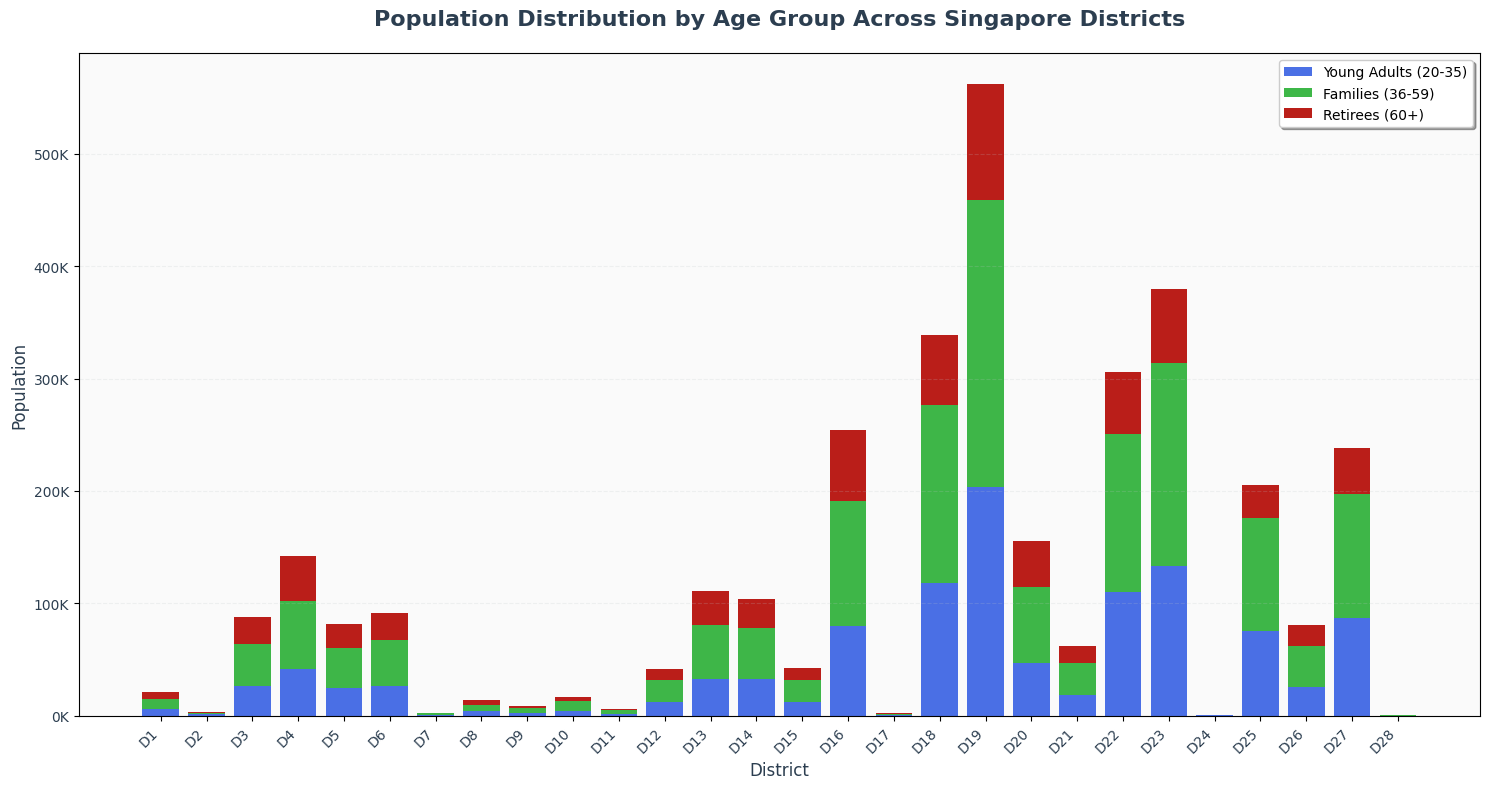

Top 5 Most Populated Districts with Age Group Breakdown:
D19: 659,470 total
  - Young Adults: 203,700 (30.9%)
  - Families: 255,100 (38.7%)
  - Retirees: 103,000 (15.6%)

D23: 452,630 total
  - Young Adults: 132,980 (29.4%)
  - Families: 180,980 (40.0%)
  - Retirees: 65,460 (14.5%)

D18: 401,120 total
  - Young Adults: 118,200 (29.5%)
  - Families: 158,420 (39.5%)
  - Retirees: 61,940 (15.4%)

D22: 357,840 total
  - Young Adults: 109,710 (30.7%)
  - Families: 140,510 (39.3%)
  - Retirees: 56,010 (15.7%)

D16: 289,750 total
  - Young Adults: 79,430 (27.4%)
  - Families: 111,640 (38.5%)
  - Retirees: 62,750 (21.7%)



In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Create stacked bar chart
plt.figure(figsize=(15, 8))

# Prepare data
districts = [f'D{d}' for d in district_grouped['District']]
young_adults = district_grouped['Young_Adults_20_35']
families = district_grouped['Families_36_59']
retirees = district_grouped['Retirees_60_Plus']

# Create stacked bars with custom hex colors
bars1 = plt.bar(districts, young_adults, label='Young Adults (20-35)', color='#3760e3', alpha=0.9)
bars2 = plt.bar(districts, families, bottom=young_adults, label='Families (36-59)', color='#29af34', alpha=0.9)
bars3 = plt.bar(districts, retirees, bottom=young_adults + families, label='Retirees (60+)', color='#b30600', alpha=0.9)

# Customize the chart
plt.title('Population Distribution by Age Group Across Singapore Districts', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
plt.xlabel('District', fontsize=12, color='#2C3E50')
plt.ylabel('Population', fontsize=12, color='#2C3E50')
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(axis='y', alpha=0.2, linestyle='--', color='#BDC3C7')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', color='#2C3E50')
plt.yticks(color='#2C3E50')

# Format y-axis to show numbers in thousands
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Set background color
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('white')

plt.tight_layout()
plt.show()

# Show top 5 most populated districts with breakdown
print("Top 5 Most Populated Districts with Age Group Breakdown:")
top_5 = district_grouped.nlargest(5, 'Total')
for _, row in top_5.iterrows():
    print(f"D{row['District']}: {row['Total']:,} total")
    print(f"  - Young Adults: {row['Young_Adults_20_35']:,} ({row['Young_Adults_20_35']/row['Total']*100:.1f}%)")
    print(f"  - Families: {row['Families_36_59']:,} ({row['Families_36_59']/row['Total']*100:.1f}%)")
    print(f"  - Retirees: {row['Retirees_60_Plus']:,} ({row['Retirees_60_Plus']/row['Total']*100:.1f}%)")
    print()

# Standardizing

In [65]:
# Create standardized data with percentages
district_standardized = district_grouped.copy()

# Calculate percentages for each age group
district_standardized['Young_Adults_Pct'] = (district_standardized['Young_Adults_20_35'] / district_standardized['Total'] * 100).round(1)
district_standardized['Families_Pct'] = (district_standardized['Families_36_59'] / district_standardized['Total'] * 100).round(1)
district_standardized['Retirees_Pct'] = (district_standardized['Retirees_60_Plus'] / district_standardized['Total'] * 100).round(1)

# Show the standardized data
print("Standardized Data (Percentages by District):")
district_standardized = district_standardized[['District', 'Total', 'Young_Adults_Pct', 'Families_Pct', 'Retirees_Pct']]

district_standardized



Standardized Data (Percentages by District):


,District,Total,Young_Adults_Pct,Families_Pct,Retirees_Pct
0,1,22460,26.4,39.1,27.0
1,2,3720,28.2,43.5,26.3
2,3,98050,26.7,38.3,24.4
3,4,157320,26.2,38.6,25.2
4,5,91630,26.9,38.6,23.4
5,6,101210,26.4,39.8,24.1
6,7,2720,29.8,50.4,11.8
7,8,14590,26.7,40.0,26.2
8,9,10110,26.6,44.2,18.4
9,10,19000,24.0,42.9,18.5


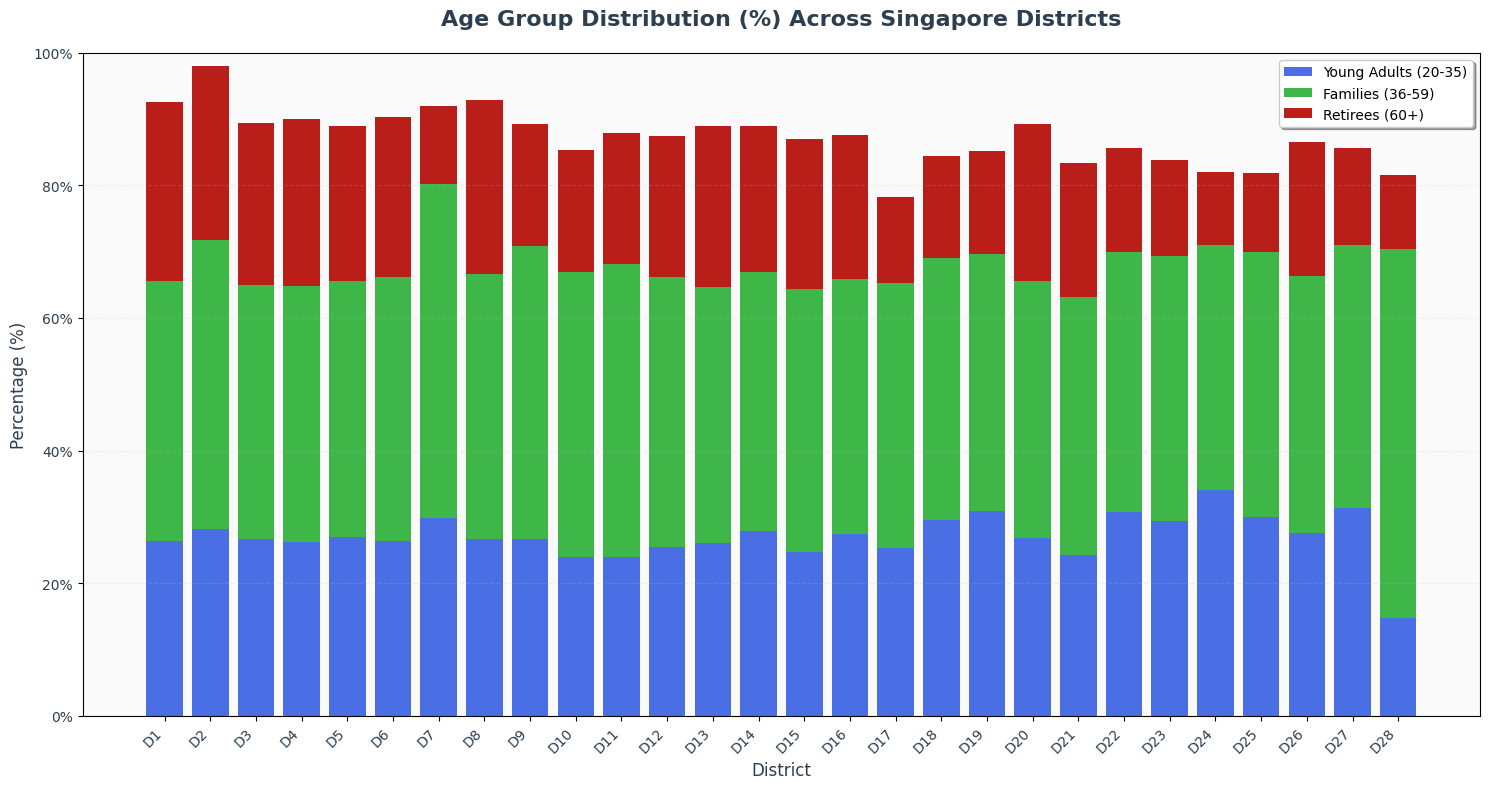

Districts with highest concentration of Young Adults:
D24.0: 34.0%
D27.0: 31.4%
D19.0: 30.9%
D22.0: 30.7%
D25.0: 30.0%

Districts with highest concentration of Families:
D28.0: 55.6%
D7.0: 50.4%
D9.0: 44.2%
D11.0: 44.2%
D2.0: 43.5%

Districts with highest concentration of Retirees:
D1.0: 27.0%
D2.0: 26.3%
D8.0: 26.2%
D4.0: 25.2%
D3.0: 24.4%


In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Create stacked bar chart with percentages
plt.figure(figsize=(15, 8))

# Prepare data
districts = [f'D{d}' for d in district_standardized['District']]
young_adults_pct = district_standardized['Young_Adults_Pct']
families_pct = district_standardized['Families_Pct']
retirees_pct = district_standardized['Retirees_Pct']

# Create stacked bars with custom hex colors
bars1 = plt.bar(districts, young_adults_pct, label='Young Adults (20-35)', color='#3760e3', alpha=0.9)
bars2 = plt.bar(districts, families_pct, bottom=young_adults_pct, label='Families (36-59)', color='#29af34', alpha=0.9)
bars3 = plt.bar(districts, retirees_pct, bottom=young_adults_pct + families_pct, label='Retirees (60+)', color='#b30600', alpha=0.9)

# Customize the chart
plt.title('Age Group Distribution (%) Across Singapore Districts', fontsize=16, fontweight='bold', pad=20, color='#2C3E50')
plt.xlabel('District', fontsize=12, color='#2C3E50')
plt.ylabel('Percentage (%)', fontsize=12, color='#2C3E50')
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)
plt.grid(axis='y', alpha=0.2, linestyle='--', color='#BDC3C7')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', color='#2C3E50')
plt.yticks(color='#2C3E50')

# Set y-axis to show percentages
plt.ylim(0, 100)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Set background color
plt.gca().set_facecolor('#FAFAFA')
plt.gcf().patch.set_facecolor('white')

plt.tight_layout()
plt.show()

# Show districts with highest concentration of each age group
print("Districts with highest concentration of Young Adults:")
top_young = district_standardized.nlargest(5, 'Young_Adults_Pct')[['District', 'Young_Adults_Pct']]
for _, row in top_young.iterrows():
    print(f"D{row['District']}: {row['Young_Adults_Pct']}%")

print("\nDistricts with highest concentration of Families:")
top_families = district_standardized.nlargest(5, 'Families_Pct')[['District', 'Families_Pct']]
for _, row in top_families.iterrows():
    print(f"D{row['District']}: {row['Families_Pct']}%")

print("\nDistricts with highest concentration of Retirees:")
top_retirees = district_standardized.nlargest(5, 'Retirees_Pct')[['District', 'Retirees_Pct']]
for _, row in top_retirees.iterrows():
    print(f"D{row['District']}: {row['Retirees_Pct']}%")